# Chapter 8: Cryo-Electron Microscopy

Excursion: Single Particle Reconstruction in Cryo-Electron Microscopy

# Problem 8.1 - 1D, Alignment via Correlation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
import pandas as pd
from scipy.ndimage.interpolation import shift

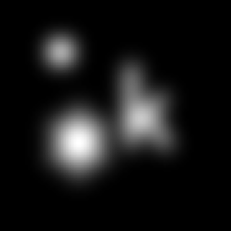

In [22]:
# Bringing the Reference Image data into the program using plt.imread and reshaping data to plot using plt.imshow
ref_im = plt.imread('test2Dblur.tif')
ref_im.shape
ref_im.dtype
ref_im[:10,:10]

# Plotting the reference image being used
plt.figure('Reference Image')
#plt.title('Reference Image')
plt.imshow(ref_im)
plt.axis('off')
plt.set_cmap('gray') 
fig =  plt.gcf() 
fig.set_facecolor('black')
plt.savefig('2DimageBlur.jpg')

In [2]:
# Loading the 1dImages.npz file containing the variables shown below:
file = np.load('1dImages.npz')
file.files

# 1dImages.npz: contains variables:
#  noiselevels = array containing 1/sqrt(SNR) for each of 3 simulated datasets
#  shiftSD = how many pixels to jitter the fake data
#  samples = 3D array containing simulated images
#	 samples[i,j,k] where i=which image, j = position in image, k = which noiselevel

['samples', 'noiselevels', 'shiftSD']

In [3]:
# Splitting the .npz file, I was able to pull out the following variables:
samples = file['samples']
print("Samples = {} \n".format(samples))

noise = file['noiselevels']
print('Noise Levels = {} \n'.format(noise))

sigma = file['shiftSD']
print('ShiftSD = {}'.format(sigma))

Samples = [[[-0.34891339 -0.1744567  -0.04361418]
  [ 1.23325128  0.61662566  0.15415645]
  [-3.9701316  -1.98506588 -0.49626659]
  ...
  [-1.44030302 -0.72015155 -0.18003794]
  [-2.17315362 -1.0865768  -0.27164418]
  [ 0.6120713   0.30603565  0.07650891]]

 [[ 0.30164451  0.02627636 -0.18024976]
  [-1.39606299 -0.66465952 -0.11610692]
  [-1.00119849 -0.50954124 -0.1407983 ]
  ...
  [-0.44178586 -0.22089293 -0.05522323]
  [-0.4198908  -0.2099454  -0.05248635]
  [ 3.64324674  1.82162337  0.45540584]]

 [[ 1.04237307  1.55845213  1.94551143]
  [ 3.56336813  3.13312725  2.81044659]
  [ 0.34124124  1.45237727  2.2857293 ]
  ...
  [-3.36869882 -1.68434941 -0.42108735]
  [ 0.17679862  0.08839931  0.02209983]
  [-0.75173389 -0.37586694 -0.09396674]]

 ...

 [[ 2.48715621  1.24376507  0.31122171]
  [-0.43520711 -0.21830131 -0.05562195]
  [ 0.04489534  0.02505171  0.01016899]
  ...
  [ 2.70927792  1.35463896  0.33865974]
  [-0.19784718 -0.09892359 -0.0247309 ]
  [ 0.58714063  0.29357031  0.0733

In [4]:
#------------------------------------------------------------------------------------------------------
# The Following code was used during my initial investigation into the dataset, this may be inaccurate.
#------------------------------------------------------------------------------------------------------

# Splicing the 'samples' variable array into their i,j,k sub-variables when,
#   {samples[i,j,k] where i=which image, j = position in image, k = which noiselevel}
i = samples[:,0] # Which Image 
j = samples[:,1] # Position in Image
k = samples[:,2] # Which Noise Level
#print('Which Image = \n',i, '\n\n')
#print('Position in Image = \n',j, '\n\n')
#print('Which Noise Level = \n',k, '\n\n')

# Pulling out the data set for each noise level
# Which Image
lsample_i = i[:,0] # large noise sample size = 2
msample_i = i[:,1] # Medium noise sample size = 1
ssample_i = i[:,2] # Small noise sample size = 0.25
#print('Which Image: \n',ssample_i,'\n\n',msample_i,'\n\n', lsample_i,'\n\n')

# Position of Image
lsample_j = j[:,0]
msample_j = j[:,1]
ssample_j = j[:,2]
#print('Position in Image: \n',ssample_j,'\n\n',msample_j,'\n\n', lsample_j,'\n\n')

# Which Noise Level
lsample_k = k[:,0]
msample_k = k[:,1]
ssample_k = k[:,2]
#print('Which Noise Level: \n',ssample_k,'\n\n',msample_k,'\n\n', lsample_k,'\n\n')

# For the lowest noise level, find the naive average of each pixel over samples and call it "Template"
min_noise = np.min(noise)
#print(min_noise)

N = np.size(ssample_i)
n = np.arange(1,N+1)
n_ave = ssample_i.cumsum()/n
#print(n)

# Ploting what I believe is the naive average over the size of the array
#plt.figure()
#plt.plot(n,n_ave, 'b-');
#plt.plot(np.cumsum(np.ones(np.size(i[:,2]))), i[:,2], 'b.');

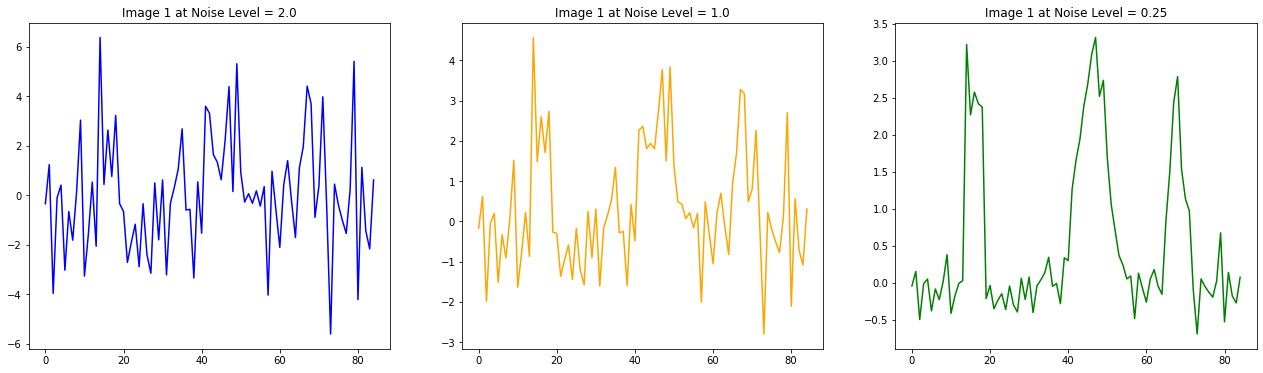

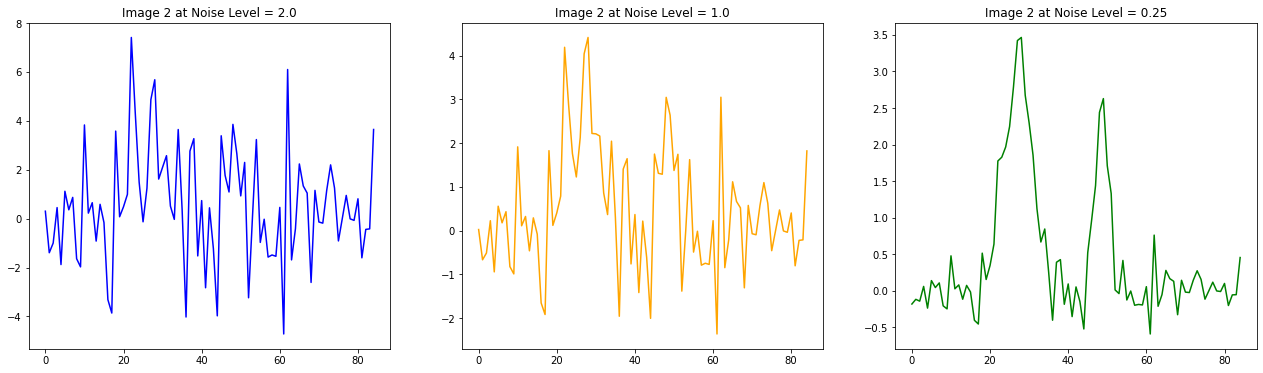

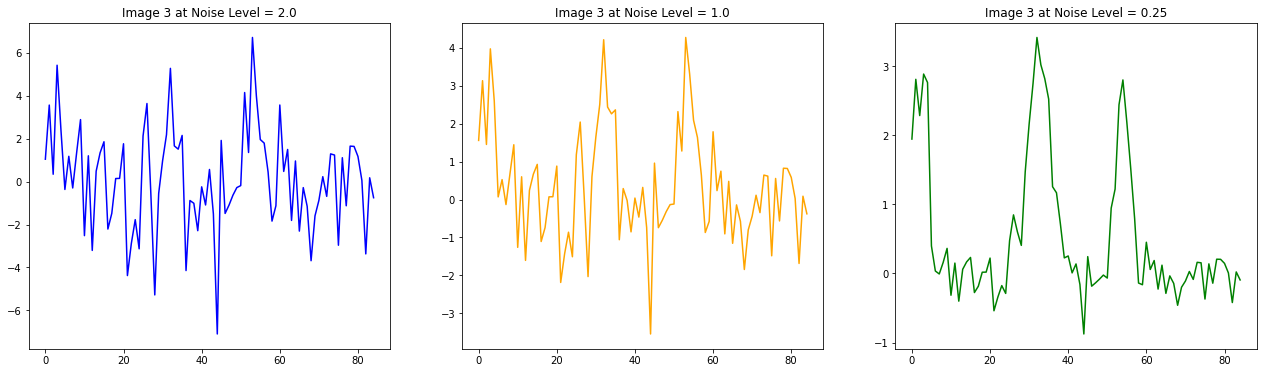

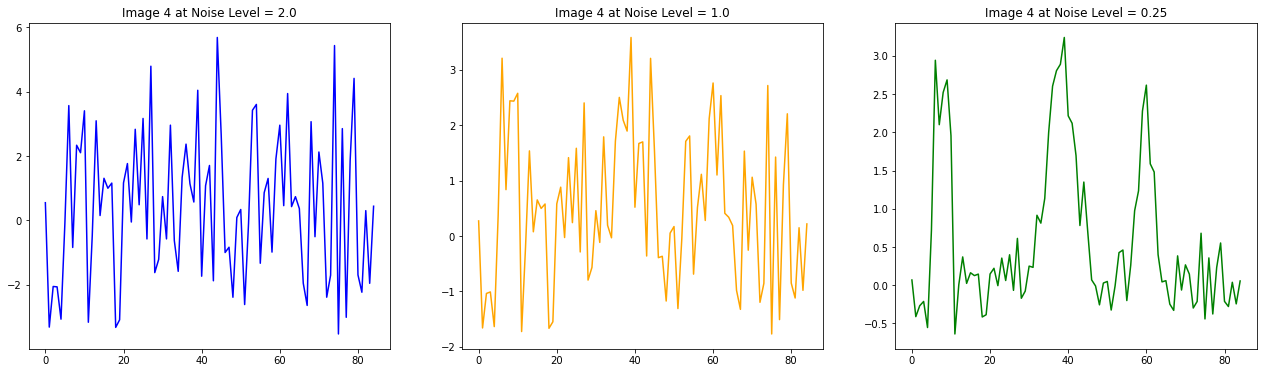

In [5]:
# After recieving help from Dr. Kinder
# Displaying the 3 images at each respective noise level that exist in the variable array 'samples'
n = 4
for x in range(n):
    plt.figure('Image {}'.format(x+1), figsize=(22,6))
    for i in range(1):
        plt.subplot(1,3,1)
        plt.plot(samples[x,:,0], color='blue')
        plt.title('Image {} at Noise Level = {}'.format(x+1,noise[0]))
        plt.subplot(1,3,2)
        plt.plot(samples[x,:,1], color='orange')
        plt.title('Image {} at Noise Level = {}'.format(x+1,noise[1]))
        plt.subplot(1,3,3)
        plt.plot(samples[x,:,2], color='green')
        plt.title('Image {} at Noise Level = {}'.format(x+1,noise[2]))
    plt.savefig('Image {} at the 3 Different Noise Levels.jpg'.format(x+1))
              

In [6]:
# Therefore, analysing the first image
larges1 = samples[0,:,0] # Analysing the first image, first noise level (=2)
meds1 = samples[0,:,1]   # Analysing the first image, second noise level (=1)
smalls1 = samples[0,:,2] # Analysing the first image, third noise level (=0.25)

# Therefore, analysing the second image
larges2 = samples[1,:,0]
meds2 = samples[1,:,1]
smalls2 = samples[1,:,2]

# Therefore, analysing the third image
larges3 = samples[2,:,0]
meds3 = samples[2,:,1]
smalls3 = samples[2,:,2]

# This may be repeated until 1500 iterations have taken place (samples[1499, :, (0,1, or 2)]

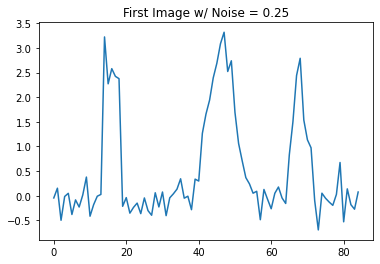

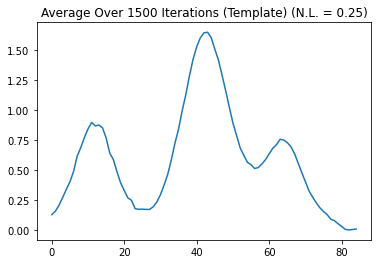

In [7]:
# For the lowest noise level, find the naive average of each pixel over samples
# (first column, bottom row of Figure 8.5 on Page 211 of the textbook)
n = 85
N = 1500

plt.figure()
plt.plot(samples[0,:,2])
plt.title('First Image w/ Noise = 0.25')
plt.savefig('First Image with Noise = 0.25.jpg')

dx = np.zeros(n)
for i in range(N):
    dx = dx + samples[i,:,2]
y = dx/N
#print(dx)

plt.figure()
template = plt.plot(y)
plt.title('Average Over 1500 Iterations (Template) (N.L. = 0.25)')
plt.savefig('Average Over 1500 Iterations (Template) (N.L. = 0.25).jpg')

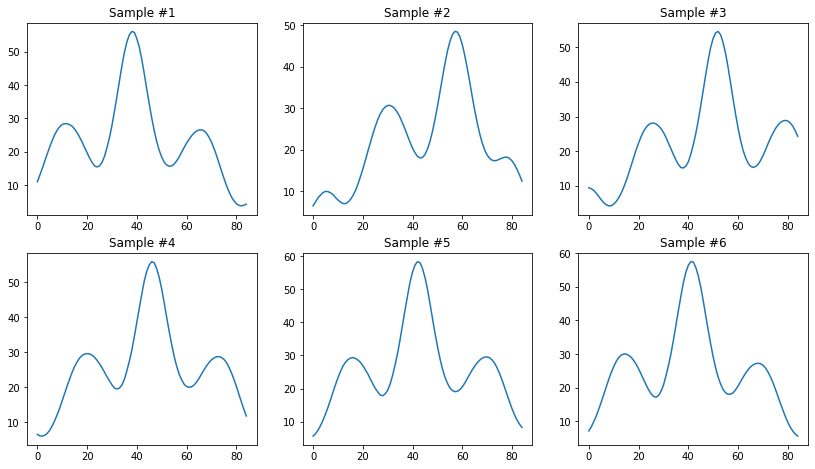

In [8]:
# Find the cross-correlations of this template above with each sample and display the first few
# Third column, bottom row of Figure 8.5 on p.211
CC = np.zeros(n)

for i in range(N):
    CC = np.correlate(y, samples[i,:,2], mode="same") # This generates the cross-correlation of the template above with each sample data given
    # This takes a lot of processing power to display each cross-correlation
    #count = i+1
    #plt.figure()
    #plt.plot(CC)
    #plt.title("Cross-Correlation between Template and Sample #{}".format(count))

# Therefore we will display the first 5 iterations of the cross-correlation
plt.figure(figsize=(14,12))
for i in range(6):
    CC = np.correlate(y, samples[i,:,2], mode="same")
    count = i+1
    plt.subplot(3,3,i+1)
    plt.plot(CC)
    plt.title("Sample #{}".format(count))
plt.savefig('Cross-Correlations First 6 Samples (N.L. = 0.25).jpg')

[56.08597198 48.5009125  54.57945151 55.86725971 58.33189126 57.47274759]
[38. 57. 52. 46. 42. 41.]
[37. 19.  5.  6.  4.  1.]
43
[  5. -14.  -9.  -3.   1.   2.]


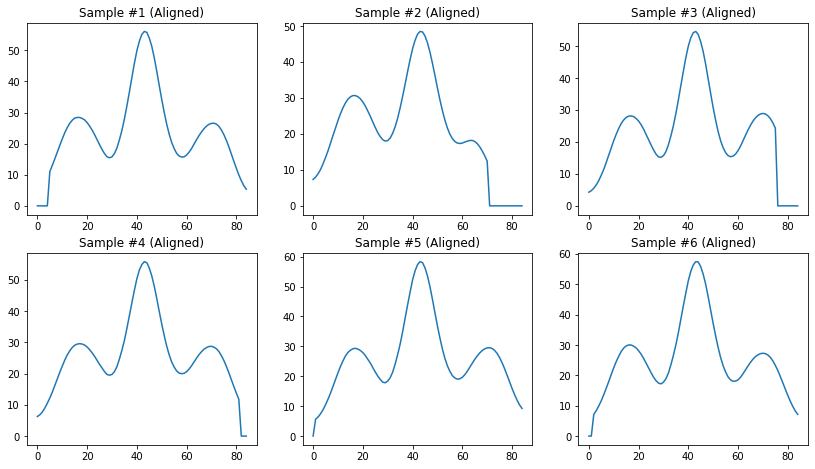

In [9]:
# For each sample, find the maximum of the cross-correlation and use it to shift the sample into optimal alignment with the template.
# this shifting will leave some pixels empty, therefore set these to zero
# discard any pixel that shifts outside of the range from 0 to 84
M = 6

CC = np.zeros(n)
CC_max = np.zeros(M)
max_positions = np.ones(M)
dmax_pos = np.zeros(M)
dp = np.zeros(M)

plt.figure('(N.L. = 0.25)',figsize=(14,12))
for i in range(M):
    CC = np.correlate(y, samples[i,:,2], mode="same") # cross-correlation of each sample with the template
    CC_max[i] = max(CC) # adding the maximum value of each sample's cross-correlation to a 1d array
    pos = np.argmax(CC, axis=0) # position of this maximum value
    max_positions[i] += pos -1 # adding each of these positions into a 1d array
    dmax_pos[i] += np.abs(max_positions[i]-max_positions[i-1]) # adding each difference in position between these max values into a 1d array
    temp_max_pos = np.argmax(y, axis=0) # calculating the max value position of the template
    dp[i] += (temp_max_pos-max_positions[i]) # adding the difference between the max value positiions of the guess samples and the template to a 1d array
    align = shift(CC, dp[i]) # shifting the max values to align with that of the template's max value position
    plt.subplot(3,3,i+1)
    plt.plot(align)
    plt.title('Sample #{} (Aligned)'.format(i+1))
plt.savefig('First 6 Sample Guesses Aligned to the Template (N.L. = 0.25).jpg')

print(CC_max)
print(max_positions)
print(dmax_pos)
print(temp_max_pos)
print(dp) 

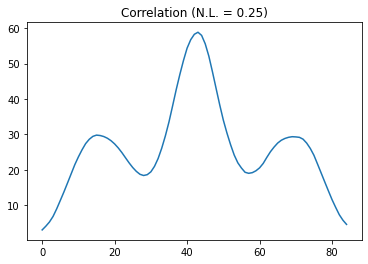

In [13]:
# Repeating the steps above, except for every sample in N; rather than the first 6
# This is the final correlation graph found in the bottom right corner of Figure 8.5 on p.211 of the Textbook (PMLS)

CC = np.zeros(n)
CC_max = np.zeros(N)
max_positions = np.ones(N)
dmax_pos = np.zeros(N)
dp = np.zeros(N)
T_align = np.zeros(n)

plt.figure()
for i in range(N):
    CC = np.correlate(y, samples[i,:,2], mode="same") # cross-correlation of each sample with the template
    CC_max[i] = max(CC) # adding the maximum value of each sample's cross-correlation to a 1d array
    pos = np.argmax(CC, axis=0) # position of this maximum value
    max_positions[i] += pos -1 # adding each of these positions into a 1d array
    dmax_pos[i] += np.abs(max_positions[i]-max_positions[i-1]) # adding each difference in position between these max values into a 1d array
    temp_max_pos = np.argmax(y, axis=0) # calculating the max value position of the template
    dp[i] += (temp_max_pos-max_positions[i]) # adding the difference between the max value positiions of the guess samples and the template to a 1d array
    align = shift(CC, dp[i])
    T_align = T_align + align
    correlation = T_align/N
plt.plot(correlation)
plt.title('Correlation (N.L. = 0.25)')
plt.savefig('Correlation (N.L. = 0.25).jpg')

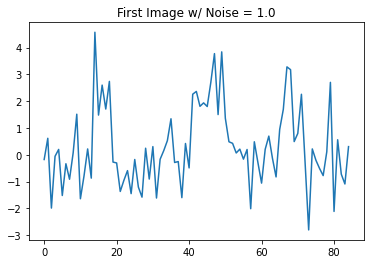

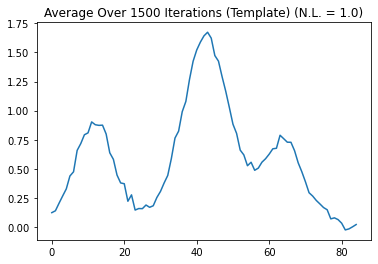

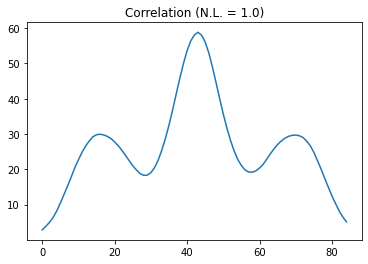

In [14]:
# Repeating the steps above, except for every sample in N with noise levels = 1.0
# This is the final correlation graph found in the bottom right corner of Figure 8.5 on p.211 of the Textbook (PMLS)
plt.figure()
plt.plot(samples[0,:,1])
plt.title('First Image w/ Noise = 1.0')
plt.savefig('First Image with Noise = 1.0.jpg')

dx = np.zeros(n)
for i in range(N):
    dx = dx + samples[i,:,1]
y = dx/N
#print(dx)

plt.figure()
template = plt.plot(y)
plt.title('Average Over 1500 Iterations (Template) (N.L. = 1.0)')
plt.savefig('Average Over 1500 Iterations (Template) (N.L. = 1.0).jpg')

CC = np.zeros(n)
CC_max = np.zeros(N)
max_positions = np.ones(N)
dmax_pos = np.zeros(N)
dp = np.zeros(N)
T_align = np.zeros(n)

plt.figure()
for i in range(N):
    CC = np.correlate(y, samples[i,:,1], mode="same") # cross-correlation of each sample with the template
    CC_max[i] = max(CC) # adding the maximum value of each sample's cross-correlation to a 1d array
    pos = np.argmax(CC, axis=0) # position of this maximum value
    max_positions[i] += pos -1 # adding each of these positions into a 1d array
    dmax_pos[i] += np.abs(max_positions[i]-max_positions[i-1]) # adding each difference in position between these max values into a 1d array
    temp_max_pos = np.argmax(y, axis=0) # calculating the max value position of the template
    dp[i] += (temp_max_pos-max_positions[i]) # adding the difference between the max value positiions of the guess samples and the template to a 1d array
    align = shift(CC, dp[i])
    T_align = T_align + align
    correlation = T_align/N
plt.plot(correlation)
plt.title('Correlation (N.L. = 1.0)')
plt.savefig('Correlation (N.L. = 1.0).jpg')

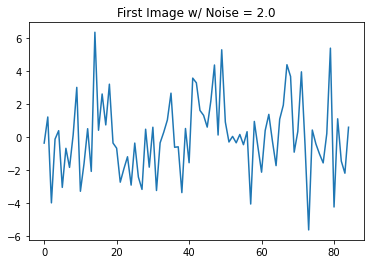

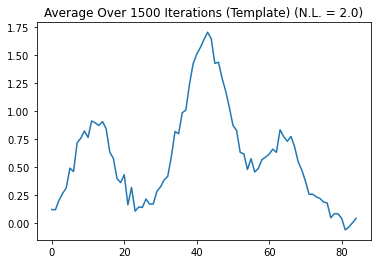

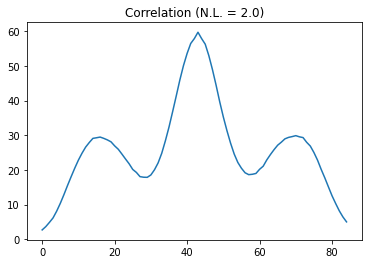

In [15]:
# Repeating the steps above, except for every sample in N with noise levels = 2.0
# This is the final correlation graph found in the bottom right corner of Figure 8.5 on p.211 of the Textbook (PMLS)
plt.figure()
plt.plot(samples[0,:,0])
plt.title('First Image w/ Noise = 2.0')
plt.savefig('First Image with Noise = 2.0.jpg')

dx = np.zeros(n)
for i in range(N):
    dx = dx + samples[i,:,0]
y = dx/N
#print(dx)

plt.figure()
template = plt.plot(y)
plt.title('Average Over 1500 Iterations (Template) (N.L. = 2.0)')
plt.savefig('Average Over 1500 Iterations (Template) (N.L. = 2.0).jpg')

CC = np.zeros(n)
CC_max = np.zeros(N)
max_positions = np.ones(N)
dmax_pos = np.zeros(N)
dp = np.zeros(N)
T_align = np.zeros(n)

plt.figure()
for i in range(N):
    CC = np.correlate(y, samples[i,:,0], mode="same") # cross-correlation of each sample with the template
    CC_max[i] = max(CC) # adding the maximum value of each sample's cross-correlation to a 1d array
    pos = np.argmax(CC, axis=0) # position of this maximum value
    max_positions[i] += pos -1 # adding each of these positions into a 1d array
    dmax_pos[i] += np.abs(max_positions[i]-max_positions[i-1]) # adding each difference in position between these max values into a 1d array
    temp_max_pos = np.argmax(y, axis=0) # calculating the max value position of the template
    dp[i] += (temp_max_pos-max_positions[i]) # adding the difference between the max value positiions of the guess samples and the template to a 1d array
    align = shift(CC, dp[i])
    T_align = T_align + align
    correlation = T_align/N
plt.plot(correlation)
plt.title('Correlation (N.L. = 2.0)')
plt.savefig('Correlation (N.L. = 2.0).jpg')

# Problem 8.2 - 1D, Maximum Posterior

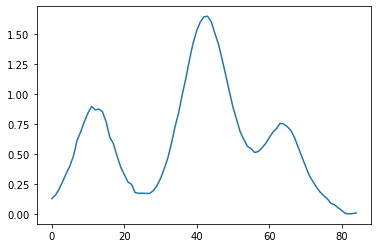

In [141]:
#We will be applying the method outlined in Section 8.6 (p.210) to the simulated images in Dataset 11.
# First we will construct a template for one of the noise levels (N.L. = 0.25) like we did in Problem 8.1

dx = np.zeros(n)
for i in range(N):
    dx = dx + samples[i,:,2]
y = dx/N
#print(dx)

plt.figure()
A_prev = plt.plot(y)

In [ ]:
# Now we will use this to write a loop that iterates several times, obtaining A_next from A_prev via Equation 8.18 (p.215)

for i in range(M)
    A_next = 